# 决策树算法
> 参考地址：https://scikit-learn.org/stable/modules/tree.html
- 决策树（DTs）是一种**非参数化监督学习**方法，用于**分类和回归**。目标是创建一个模型，通过学习从数据要素推断的简单决策规则来预测目标变量的值。

# 决策树的一些优点是：

- 易于理解和解释。树木可以可视化。

- 只需很少的数据准备。其他技术通常需要数据规范化，需要创建虚拟变量并删除空白值。但请注意，此模块不支持缺失值。

- 使用树的成本（即预测数据）是用于训练树的数据点数的对数。

- 能够同时处理数字和分类数据。其他技术通常专门分析只有一种类型的变量的数据集。有关详细信息，请参阅算法。

- 能够处理多输出问题。

- 使用白框模型。如果在模型中可以观察到给定的情况，则布尔逻辑很容易解释此情况的解释。相比之下，在黑盒模型中（例如，在人工神经网络中），结果可能更难解释。

- 可以使用统计测试验证模型。这使得可以考虑模型的可靠性。

- 即使生成数据的真实模型在某种程度上违反了其假设，也执行良好。

# 决策树的缺点包括：

- 决策树学员可以创建不很好地概括数据的复杂树。这称为过度拟合。为了避免此问题，需要建立修剪、设置叶节点上所需的最小样本数或设置树的最大深度等机制。

- 决策树可能不稳定，因为数据中的细微变化可能会导致生成完全不同的树。通过使用组合中的决策树来缓解此问题。

- 在优化的几个方面，甚至对于简单概念，学习最佳决策树的问题已知是NP-完成。因此，实用的决策树学习算法基于启发式算法，例如贪婪算法，其中在每个节点上做出本地最佳决策。此类算法不能保证返回全局最佳决策树。这可以通过在合奏学员中训练多个树来缓解，其中特征和样本会随机采样替换。

- 有些概念很难学习，因为决策树不容易表达它们，例如 XOR、奇偶校验或多路复用器问题。

- 如果某些类占主导地位，决策树学习者会创建有偏见的树。因此，建议在与决策树拟合之前平衡数据集。

# 分类
- 两个数组作为输入，第一个存储特征值，第二个存储结果

In [17]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [18]:
clf.predict([[2., 2.]])

array([1])

In [19]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [20]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
#X存储的是特征值，y存储的是种类

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

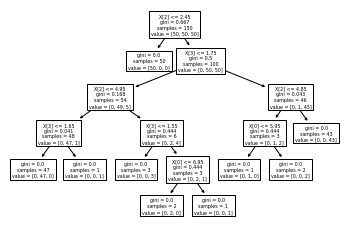

In [21]:
tree.plot_tree(clf)

In [22]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

- graphviz库的左右要是可视化决策树，要pip和apt安装
- sudo apt-get install graphviz
- pip install graphviz

# 回归
- 决策树也可以应用于回归问题，使用决策树回归器类

带决策树的 1D 回归。

决策树用于拟合正弦曲线，并添加噪声观测。因此，它学习近似于内弦曲线的局部线性回归。

我们可以看到，如果树的最大深度（由参数控制）设置得太高，则决策树会学习训练数据太精细的细节，并从噪声中学习，即它们过度拟合。max_depth

Automatically created module for IPython interactive environment


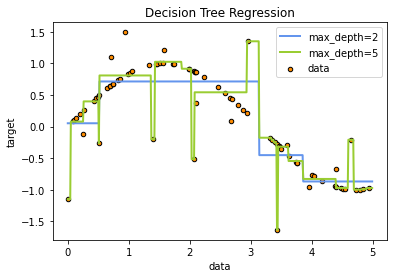

In [26]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()